In [19]:

import gensim
import numpy as np
from pathlib import Path
import pickle
from time import time
from typing import List, Dict, Set, Tuple
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
import numpy as np
import gensim
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA

from pandas_profiling import ProfileReport


In [20]:
modelwo = gensim.models.KeyedVectors.load_word2vec_format(r'wiki_300_5_word2vec.bin',binary=True)


In [22]:
attrition = 'test.csv'
df_ac = pd.read_csv(attrition,encoding='utf-8')
df_ac

,K,word,S1,S2,S3,S4,S5,S6
0,1,백신패스,vaccine,inoculation,admit,epidemic,force,certification
1,2,위드코로나,normalize,recuperation,coexistence,vaccine,inoculation,infection
2,3,접종완료자,vaccine,inoculation,completion,effect,entry,death
3,4,ウィズコロナ,recuperation,coexistence,vaccine,inoculation,Normalize,state
4,5,段階日常回復,stage,recuperation,daily,state,coexistence,virus
5,6,ワクチンパスポト,vaccine,inoculation,certification,inspection,obligation,passport
6,7,内卷,compete,excessive,excessive,effort,Useless,society
7,8,노오력,effort,compete,society,Useless,lack,more
8,9,道路族,noise,dislike,driver,road,child,damage
9,10,無策政府,measures,absent,impotent,prevention,government,strategy


In [302]:
V=1
df_pc=str(list(modelwo[df_ac.loc[df_ac['K']==V]['S1'].values[0]].ravel()))+'|'+str(list(modelwo[df_ac.loc[df_ac['K']==V]['S2'].values[0]].ravel()))+'|'+str(list(modelwo[df_ac.loc[df_ac['K']==V]['S3'].values[0]].ravel()))+'|'+str(list(modelwo[df_ac.loc[df_ac['K']==V]['S4'].values[0]].ravel()))+'|'+str(list(modelwo[df_ac.loc[df_ac['K']==V]['S5'].values[0]].ravel()))+'|'+str(list(modelwo[df_ac.loc[df_ac['K']==V]['S6'].values[0]].ravel()))
f = open("model_Weight.txt",'w') 
f.write(df_pc)


22622

In [2]:
from pathlib import Path
import pickle
from time import time
from typing import List, Dict, Set, Tuple
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
import numpy as np
import gensim
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA

from pandas_profiling import ProfileReport


In [4]:
attrition_data = 'cbd.csv'
df_attrition = pd.read_csv(attrition_data)
target_column = 'word'
selected_columns = ['K', 'S1', 'S2', 'S3', \
                    'S4', 'S5','S6']

df_attrition = df_attrition.loc[:, selected_columns]
df_attrition

,K,S1,S2,S3,S4,S5,S6
0,1,"-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.20120747, -0.40818706, 0.06754328, -0.208118...","-0.04608272, -0.38059863, -0.3007064, -0.10318...","-0.33770612, -0.12913908, -0.1806995, -0.08245...","0.33793184, -0.41495252, -0.010535245, -0.4272..."
1,2,"0.5636469, -0.18888175, 0.057964522, -0.309588...","-0.2408412, -0.23645157, -0.14024694, 0.156071...","-0.10034606, -0.46013853, -0.16565657, -0.1625...","-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.07270025, -0.1588778, 0.12582761, -0.1677677..."
2,3,"-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","-0.059532832, -0.0901145, -0.049665194, -0.091...","0.03562126, 0.12509596, 0.14319207, -0.3288557...","0.27164158, 0.13193674, -0.42138663, -0.097306...","0.072927535, -0.5590427, -0.24776436, 0.344729..."
3,4,"-0.2408412, -0.23645157, -0.14024694, 0.156071...","-0.10034606, -0.46013853, -0.16565657, -0.1625...","-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.5636469, -0.18888175, 0.057964522, -0.309588...","-0.16987483, -0.2249915, -0.29015827, -0.17841..."
4,5,"0.004935925, -0.13656415, -0.23017032, -0.2976...","-0.2408412, -0.23645157, -0.14024694, 0.156071...","-0.062034734, -0.13488984, -0.052092835, -0.16...","-0.16987483, -0.2249915, -0.29015827, -0.17841...","-0.10034606, -0.46013853, -0.16565657, -0.1625...","-0.21884118, -0.2691241, -0.1506517, -0.258438..."
5,6,"-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.33793184, -0.41495252, -0.010535245, -0.4272...","0.0064916573, -0.53594875, 0.034889497, 0.1467...","0.10656596, -0.34688917, 0.17991768, -0.369576...","0.08633721, -0.16881184, -0.050750516, -0.5977..."
6,7,"-0.026430313, -0.5527968, -0.21165732, -0.0986...","0.15668195, 0.255182, -0.107347004, -0.4115002...","0.15668195, 0.255182, -0.107347004, -0.4115002...","0.19520809, -0.39690083, -0.0026137067, -0.209...","0.15693353, -0.11641107, -0.32641688, -0.13244...","-0.19487536, -0.40592057, -0.1425244, -0.30701..."
7,8,"0.19520809, -0.39690083, -0.0026137067, -0.209...","-0.026430313, -0.5527968, -0.21165732, -0.0986...","-0.19487536, -0.40592057, -0.1425244, -0.30701...","0.15693353, -0.11641107, -0.32641688, -0.13244...","-0.24759538, -0.20499107, 0.100404195, 9.30740...","-0.07106998, 0.29740468, 0.0014038676, -0.0558..."
8,9,"0.15540549, 0.16284974, 0.019995658, -0.061395...","0.0411363, -0.6496471, -0.07597053, -0.3679126...","0.20251602, -0.022333687, -0.017211214, -0.006...","-0.035300724, -0.20040719, -0.008058765, -0.29...","0.321569, -0.118574455, 0.12177767, -0.1416489...","-0.058869533, -0.017393252, 0.077986926, -0.01..."
9,10,"-0.14184627, 0.21148248, -0.16795659, -0.34405...","-0.121330805, 0.24887002, -0.07413046, 0.09726...","0.25215366, -0.3572473, -0.28999817, -0.280508...","0.15191491, -0.3630346, 0.1513324, -0.09043337...","-0.12006326, -0.47301438, -0.057982806, -0.341...","0.31316382, -0.24733633, 0.10871886, -0.375476..."


In [14]:
class GraphLoader:
    def __init__(self):
        self.graph = None
        self.title = None
        
    def build_graph(self, 
                    dataframe: pd.DataFrame, 
                    columns: List, 
                    edge_list: List,
                    verbose: bool = True,
                    title: str = 'Unnamed'):
        self.title = title
        t0 = time()
        self.graph = nx.Graph(name = self.title)

        # Add Nodes to the graph.
        for column in columns:
            self.graph.add_nodes_from(dataframe[column].values, label=column)

        # Add remaining columns as Node attributes. Optional
        remaining = dataframe.columns.difference(columns)
        for node, data in self.graph.nodes(data=True):
            if data["label"] == "K":
                self.graph.nodes[node]["K"] = dataframe.loc[dataframe["K"] == int(node), remaining].squeeze().to_dict()

        # Add Edges.
        for _, row in dataframe.loc[:, columns].iterrows():
            for edge in edge_list:
                self.graph.add_edge(row[edge[0]], row[edge[1]])
        
        if verbose:
            print(f"FINISHED in {np.round(time() - t0, 3)} seconds.")
            print(nx.info(self.graph))
        
        return self.graph

    def draw_graph(self, graph: nx.Graph, node_colors: dict, node: str = None, radius: int = 1) -> None:
        def assign_colors(graph: nx.Graph) -> List:
            # Assign Colors to nodes
            colors = []
            for n, data in graph.nodes(data=True):
                node = data["label"]
                colors.append(node_colors.get(node, "white"))
            return colors

        f = plt.figure(figsize = (20,12), facecolor="darkgray")
        ax = f.add_subplot()

        if not node:    
            plt.title(self.title)
        else:
            plt.title(f"Ego Graph around the node {node}, (radius={radius})")
            graph = nx.ego_graph(graph, node, radius = radius)
        
        colors = assign_colors(graph)
        nx.draw_networkx(graph, node_size = 300, node_color = colors, with_labels = False)
        # Add an empty plot to set custom legends
        from matplotlib.lines import Line2D
        ax.scatter([],[])
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='K', markerfacecolor = node_colors['K'], markersize=15),
            Line2D([0], [0], marker='o', color='w', label='S1', markerfacecolor = node_colors['S1'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S2', markerfacecolor = node_colors['S2'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S3', markerfacecolor = node_colors['S3'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S4', markerfacecolor = node_colors['S4'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S5', markerfacecolor = node_colors['S5'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S6', markerfacecolor = node_colors['S6'], markersize=10),

        ]
        ax.legend(handles=legend_elements, loc='best')
        plt.show()

In [15]:
nodes = selected_columns[:] # Do not select Attrition as a feature node
edges = [("K","S1"),
         ("K","S2"),
         ("K","S3"),
         ("K","S4"),
         ("K","S5"),
         ("K","S6")]

node_colors = { # freestyle, update any color.
    "K": "dodgerblue", 
    "S1":"lightgreen", 
    "S2":"tan", 
    "S3":"salmon",
    "S4":"darkcyan",
    "S5":"lightblue",
    "S6":"yellow"
}

FINISHED in 0.021 seconds.
Graph named 'Multilingual Out of Vocabulary Terms relationship' with 120 nodes and 161 edges


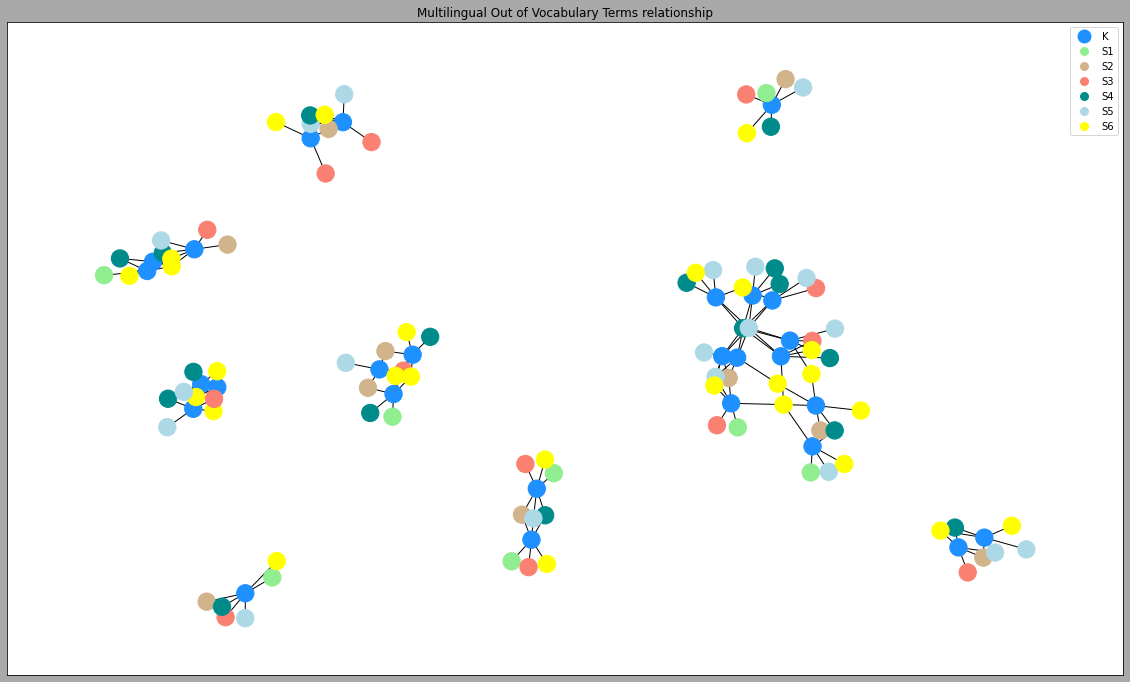

In [16]:
graph_loader = GraphLoader()
demo_graph = graph_loader.build_graph(
            dataframe = df_attrition.loc[:, selected_columns[:]],
            columns = nodes, 
            edge_list = edges,
            verbose = True,
            title = 'Multilingual Out of Vocabulary Terms relationship'
        )
# graph_loader.draw_graph(demo_graph, node_colors, node = 5, radius = 2) # show only the nodes that are at a distance of 2 edges from the employee 5.
graph_loader.draw_graph(demo_graph, node_colors) # Show the whole graph

In [17]:
CWD = Path().cwd()
EMBEDDINGS_DIR = CWD / 'embeddings'
EMBEDDINGS_DIR.mkdir(parents=True, exist_ok=True)
SEED = 12

class VectorizerConfig:
    dimensions = 128
    walk_length = 30
    num_walks = 50
    window = 10
    min_count = 1
    batch_words = 100

class NodeEmbedding:

    def __init__(self) -> None:
        self.vectorizer = None
        self.model = None
        
    def generate_random_walks(self, graph: nx.Graph, **params) -> None:
        self.vectorizer = Node2Vec(graph, **params)
        # return self.vectorizer

    def fit(self, **params) -> gensim.models.Word2Vec:
        if self.vectorizer is None:
            raise Exception("No random walks. Generate Random walks by calling generate_random_walks() method first.")
        self.model = self.vectorizer.fit(**params)
        
        return self.model
    def save_model(self, model: gensim.models.Word2Vec, save_to: Path = EMBEDDINGS_DIR, prefix: str = None) -> None:
        d = VectorizerConfig.dimensions
        w = VectorizerConfig.walk_length
        n = VectorizerConfig.num_walks
        embeddings_filename = f"{prefix}_embeddings_{d}_{w}_{n}.txt"
        model_filename = f"{prefix}_model_{d}_{w}_{n}.pkl"
        # Save only the embeddings in a txt file.
        self.model.wv.save_word2vec_format(str(EMBEDDINGS_DIR/embeddings_filename))
        # Save the entire model.
        self.model.save(str(EMBEDDINGS_DIR/model_filename))
        print(f"Model and embeddings saved to: {str(EMBEDDINGS_DIR/model_filename)}")
    def load_model(self, model_filename: str = None, load_from: Path = EMBEDDINGS_DIR) -> gensim.models.Word2Vec:
        if Path(EMBEDDINGS_DIR / model_filename).exists():
            print("Loaded Model: ", model_filename)
            with Path(EMBEDDINGS_DIR / model_filename).open(mode="r+b") as file:
                self.model = pickle.load(file)
        else:
            raise FileNotFoundError(f"NOT found: {EMBEDDINGS_DIR / model_filename}")
        
        return self.model


In [18]:
import multiprocessing

embedder = NodeEmbedding()

In [19]:
embedder.generate_random_walks(
    demo_graph,
    dimensions = VectorizerConfig.dimensions,
    walk_length = VectorizerConfig.walk_length,
    num_walks = VectorizerConfig.num_walks,
    workers = multiprocessing.cpu_count()
)

Computing transition probabilities: 100%|██████████| 120/120 [00:00<00:00, 11996.29it/s]


In [20]:
%%time
model = embedder.fit(
    window = VectorizerConfig.window,
    min_count = VectorizerConfig.min_count,
    batch_words = VectorizerConfig.batch_words
)

Wall time: 1.98 s


In [21]:

embedder.save_model(model, save_to = EMBEDDINGS_DIR, prefix = "K")

Model and embeddings saved to: c:\Users\Administrator\Dropbox\毕业论文\实验\embeddings\K_model_128_30_50.pkl


In [154]:
import multiprocessing
from pathlib import Path
import pickle
from time import time
from typing import List, Dict, Set, Tuple
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
import numpy as np
import gensim
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
attrition = 'test.csv'
df_ac = pd.read_csv(attrition,encoding='utf-8')
embedder = NodeEmbedding()
model2 = embedder.load_model(r"K_model_128_30_50.pkl", load_from = EMBEDDINGS_DIR)

Loaded Model:  K_model_128_30_50.pkl


In [155]:
with open(r'embeddings/K_embeddings_128_30_50.txt', 'r',encoding='UTF-8') as embeddings_file:
    embeddings = embeddings_file.readlines()

In [156]:
embeddings[:1]

['120 128\n']

In [157]:
# This function is requred since embeddings are out of order with the target. They were not matched correctly.
def align_features_and_target(df: pd.DataFrame, embeddings_file: str = None):
    vectors = []
    with Path(EMBEDDINGS_DIR / embeddings_file).open(mode="r",encoding='UTF-8') as file:
        results = file.readlines()
        for person in df["K"].values:
            for line in results[1:]:
                if line.split()[0] == str(person):
                    vectors.append(line.split()[1:])
    
    return np.array(vectors).astype(np.float64)

In [158]:
%%time
target_column = 'word'
selected_columns = ['K', 'S1', 'S2', 'S3', \
                    'S4', 'S5','S6']
attrition_data = 'cbd.csv'
df_attrition = pd.read_csv(attrition_data)
df_attrition = df_attrition.loc[:, selected_columns]
embeddings_filename = r"K_embeddings_128_30_50.txt"
feature_vectors = align_features_and_target(df_attrition, embeddings_file = embeddings_filename)
attrition_data = 'cbd.csv'
df_attrition = pd.read_csv(attrition_data)


CPU times: user 70.4 ms, sys: 590 µs, total: 71 ms
Wall time: 69.6 ms


In [163]:
s=1
a=model2.wv.similar_by_word(str(s))
b=[]
for i in range(len(a)):
    try:
        b.append([int(a[i][0]),a[i][1]])
    except ValueError:
        p=1
print(df_ac.loc[df_ac['K']==s]['word'])
for d in range(len(b)):
    print(str(df_ac.loc[df_ac['K']==b[d][0]]['word'])+' Similarity:'+str(b[d][1]))

0    백신패스
Name: word, dtype: object
16    健康码
Name: word, dtype: object Similarity:0.867392361164093
5    ワクチンパスポト
Name: word, dtype: object Similarity:0.8083609342575073


In [164]:
1,2,4,7,11

(1, 2, 4, 7, 11)

In [321]:
model2.wv.distance('1','11')

0.7082757353782654

In [ ]:
for i in 